The goal of this Hackathon is given the details of customers vacationing at particular clubs and resorts to predict the amount spent by the customers at the facilities

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/AV_Mahindra_Club/train.csv') 

In [ ]:
pd.options.display.max_columns = None
df_train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


EDA

In [ ]:
# Dataset dimensions
print(df_train.shape)
print("*"*57)
print("Column Data types:")
print(df_train.dtypes)

(341424, 24)
*********************************************************
Column Data types:
reservation_id                         object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                            

In [ ]:
# Dataset Description
df_train.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code,amount_spent_per_room_night_scaled,amount_spent_range
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341310.000000,336660.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,3.738346,2.673862,7.260708,4.763303,3.193390,1.124209,7.720801,0.796690
std,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,2.479054,0.885650,4.701283,3.103909,1.167824,0.329821,1.090109,0.402462
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.600397,0.000000
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,7.187260,1.000000
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000,7.860814,1.000000
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.000000,8.419144,1.000000
max,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,60.000000,4.000000,38.000000,13.000000,24.000000,2.000000,10.816652,1.000000


In [ ]:
df_train_copy = df_train 

In [ ]:
# 0: below average spenders, 
df_train_copy['amount_spent_low'] = df_train_copy['amount_spent_per_room_night_scaled'].apply(lambda s:1 if s<=5.999999 else 0)
df_train_copy['amount_spent_average'] = df_train_copy['amount_spent_per_room_night_scaled'].map(lambda s:1 if s>=6 and s<=7.999999 else 0 )
df_train_copy['amount_spent_high'] = df_train_copy['amount_spent_per_room_night_scaled'].map(lambda s:1 if s>=8 else 0)
#x['level1'] = df1['length_of_service'].map(lambda s: 1 if 1<= s <= 5 else 0)

In [ ]:
print(df_train_copy['amount_spent_low'].value_counts())
print("**************************")
print(df_train_copy['amount_spent_average'].value_counts())
print("**************************")
print(df_train_copy['amount_spent_high'].value_counts())

0    317310
1     24114
Name: amount_spent_low, dtype: int64
**************************
0    172473
1    168951
Name: amount_spent_average, dtype: int64
**************************
0    193065
1    148359
Name: amount_spent_high, dtype: int64


In [ ]:
df_train_copy['amount_spent_range'].value_counts()

1    317310
0     24114
Name: amount_spent_range, dtype: int64

In [ ]:
print(df_train_copy["amount_spent_range"].value_counts())

1    272009
0     69415
Name: amount_spent_range, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


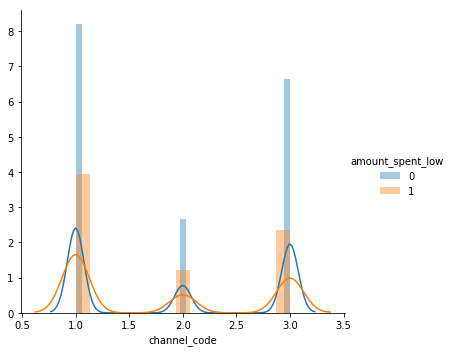

In [ ]:
#Histogram and PDF Analysis
sns.FacetGrid(df_train_copy, hue="amount_spent_low", size=5).map(sns.distplot, "channel_code").add_legend()
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


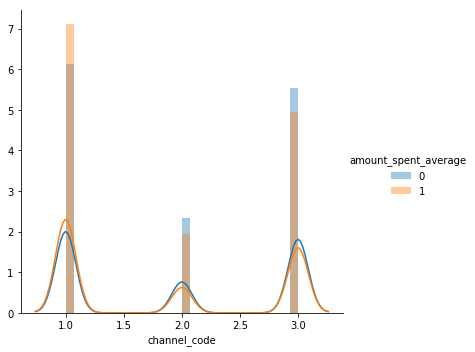

In [ ]:
#Histogram and PDF Analysis
sns.FacetGrid(df_train_copy, hue="amount_spent_average", size=5).map(sns.distplot, "channel_code").add_legend()
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


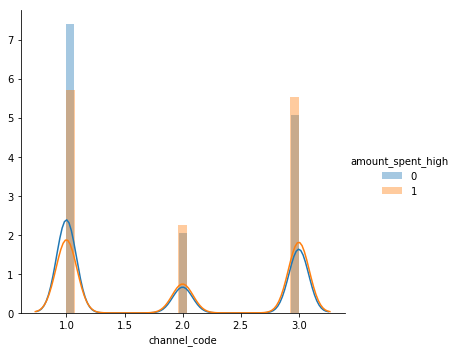

In [ ]:
#Histogram and PDF Analysis
sns.FacetGrid(df_train_copy, hue="amount_spent_high", size=5).map(sns.distplot, "channel_code").add_legend()
plt.show();

In [ ]:
print("channel code 1:")
print(df_train_copy['amount_spent_range'].loc[df_train_copy['channel_code']==1].value_counts())
print("*************************************")
print("channel code 2:")
print(df_train_copy['amount_spent_range'].loc[df_train_copy['channel_code']==2].value_counts())
print("*************************************")
print("channel code 3:")
print(df_train_copy['amount_spent_range'].loc[df_train_copy['channel_code']==3].value_counts())

channel code 1:
1    148581
0     12644
Name: amount_spent_range, dtype: int64
*************************************
channel code 2:
1    48225
0     3932
Name: amount_spent_range, dtype: int64
*************************************
channel code 3:
1    120504
0      7538
Name: amount_spent_range, dtype: int64


In [ ]:
one_hot = pd.get_dummies(df_train_copy['channel_code'])
one_hot.columns = ['CC1','CC2','CC3']
df_train_copy = df_train_copy.join(one_hot)

In [ ]:
one_hot.head()

,CC1,CC2,CC3
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
df_train_copy["HCChan"] = df_train_copy['channel_code'].map(lambda s:0 if s==3 else 1)

In [ ]:
df_train_copy.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,amount_spent_range,amount_spent_low,amount_spent_average,amount_spent_high,HCChan
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,1,0,1,0,0
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,1,0,1,0,1
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,1,0,1,0,1
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,0,1,0,0,1
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,1,0,1,0,1


In [ ]:
df_train_copy_two = df_train_copy

In [ ]:
df_try = df_train_copy_two.loc[df_train_copy_two['amount_spent_per_room_night_scaled']<=5.999999]

In [ ]:
df_train_copy_two = df_train_copy_two.append([df_try]*5,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


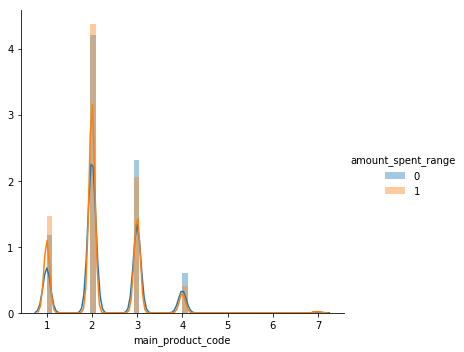

In [ ]:
#Histogram and PDF Analysis
sns.FacetGrid(df_train_copy, hue="amount_spent_range", size=5).map(sns.distplot, "main_product_code").add_legend()
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


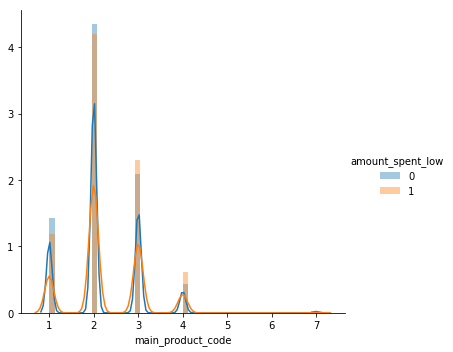

In [ ]:
#Histogram and PDF Analysis
sns.FacetGrid(df_train_copy, hue="amount_spent_low", size=5).map(sns.distplot, "main_product_code").add_legend()
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


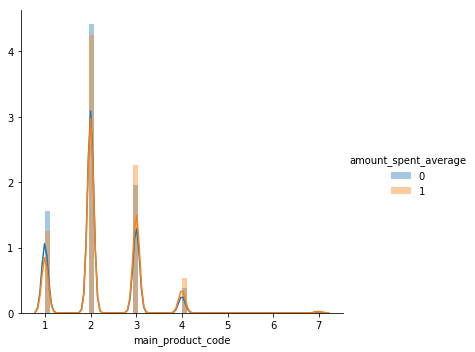

In [ ]:
#Histogram and PDF Analysis
sns.FacetGrid(df_train_copy, hue="amount_spent_average", size=5).map(sns.distplot, "main_product_code").add_legend()
plt.show();

In [ ]:
print("product code 2:")
print(df_train_copy['amount_spent_range'].loc[df_train_copy['main_product_code']==2].value_counts())

product code 2:
1    165447
0     12168
Name: amount_spent_range, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


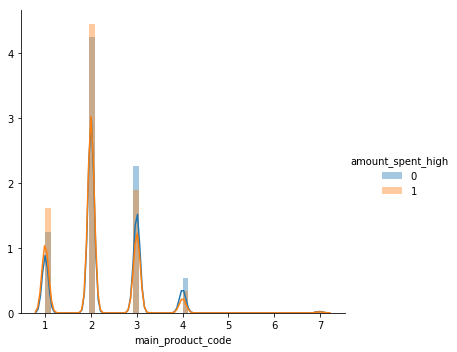

In [ ]:
#Histogram and PDF Analysis
sns.FacetGrid(df_train_copy, hue="amount_spent_high", size=5).map(sns.distplot, "main_product_code").add_legend()
plt.show();

In [ ]:
df_train_copy['Prod_code'] = df_train_copy['main_product_code'].map(lambda s:1 if s<=2 else 0)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


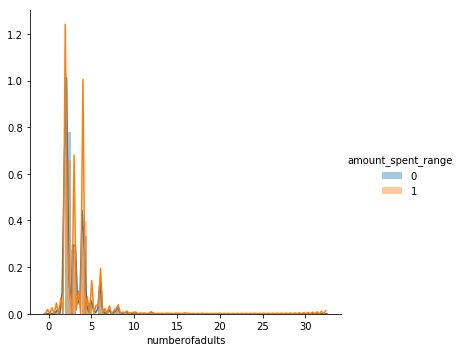

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "numberofadults").add_legend()
plt.show();

In [ ]:
print(df_train_copy["numberofadults"].value_counts())

2     149414
4      84468
3      63247
6      20052
5       9849
8       5198
7       2673
9       1445
1       1280
10      1256
12      1010
11       357
16       293
14       216
15       207
13       120
24        83
20        64
18        62
0         27
17        20
22        19
19        12
25        12
21        11
23        10
32        10
30         9
Name: numberofadults, dtype: int64


In [ ]:
#df_train_copy = df_train_copy.loc[df_train_copy['numberofadults']>0]
df_train_copy["reasonable_adult_count"] = df_train_copy['numberofadults'].map(lambda s:1 if s>0 & s<=12 else 0)

In [ ]:
print(df_train_copy["reasonable_adult_count"].value_counts())

1    340249
0      1148
Name: reasonable_adult_count, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


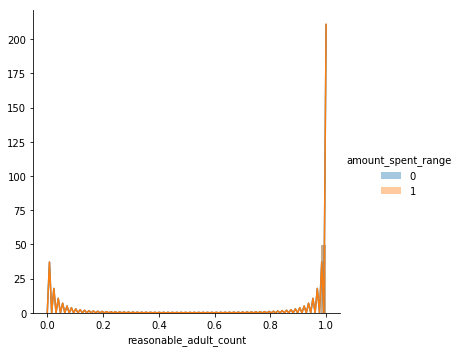

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "reasonable_adult_count").add_legend()
plt.show();

In [ ]:
df_train_couples = df_train_copy.loc[df_train_copy['numberofadults']==2]

In [ ]:
df_train_couples.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code,amount_spent_per_room_night_scaled,reasonable_adult_count,amount_spent_range
count,149414.000000,149414.000000,149414.0,149414.000000,149414.000000,149414.000000,149414.000000,149414.000000,149414.000000,149368.000000,147625.000000,149414.000000,149414.000000,149414.000000,149414.000000,149414.0,149414.000000
mean,1.786580,2.252419,2.0,0.485256,195.057076,1.784036,2.293600,3.046870,2.926205,2.700177,7.263194,4.714378,2.962728,1.116749,7.555553,1.0,0.767840
std,0.871214,0.821931,0.0,0.777655,826.038561,0.759605,1.632919,0.759189,1.534659,0.869087,4.741817,3.124038,1.014104,0.321123,1.015139,0.0,0.422212
min,1.000000,1.000000,2.0,0.000000,45.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.608938,1.0,0.000000
25%,1.000000,2.000000,2.0,0.000000,45.000000,1.000000,1.000000,3.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,7.062002,1.0,1.000000
50%,1.000000,2.000000,2.0,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000,7.684977,1.0,1.000000
75%,3.000000,3.000000,2.0,1.000000,45.000000,2.000000,3.000000,4.000000,3.000000,3.000000,8.000000,7.000000,4.000000,1.000000,8.179914,1.0,1.000000
max,3.000000,7.000000,2.0,8.000000,4995.000000,3.000000,7.000000,6.000000,39.000000,4.000000,38.000000,13.000000,24.000000,2.000000,10.814540,1.0,1.000000


In [ ]:
df_train_copy['two_adults']=df_train_copy['numberofadults'].map(lambda s:1 if s==2 else 0)

In [ ]:
print(df_train_copy["numberofchildren"].value_counts())

0     264250
1      37766
2      35164
3       2137
4       1658
6        187
5        181
8         44
7         20
10        14
12         2
13         1
Name: numberofchildren, dtype: int64


In [ ]:
df_train_copy['children_count']=df_train_copy['numberofchildren'].map(lambda s:1 if s<=3 else 0)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


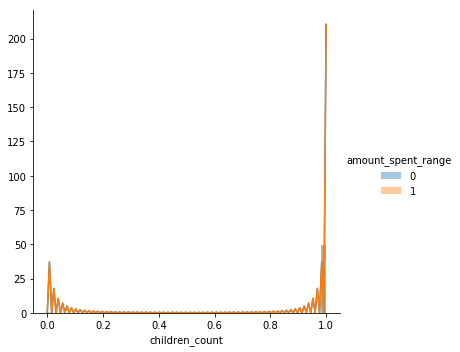

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "children_count").add_legend()
plt.show();

In [ ]:
df_train_copy['family_count'] = df_train['reasonable_adult_count']+ df_train['children_count']

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


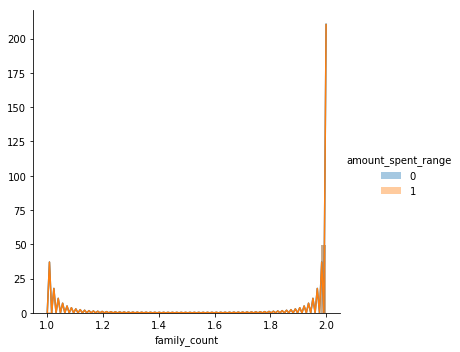

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "family_count").add_legend()
plt.show();

In [ ]:
df_train_copy['persontravellingid'].value_counts()

45      267307
47       31580
46       30569
4752     10556
4753      1391
4995        21
Name: persontravellingid, dtype: int64

In [ ]:
df_train_copy['persontravellingid'] = df_train_copy['persontravellingid'].replace({45:1, 46:2, 47:3, 4752:4, 4753:5, 4995:6 })

In [ ]:
df_train_copy['persontravellingid'].value_counts()

1    267307
3     31580
2     30569
4     10556
5      1391
6        21
Name: persontravellingid, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


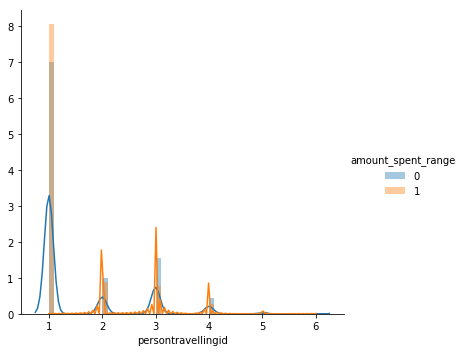

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "persontravellingid").add_legend()
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


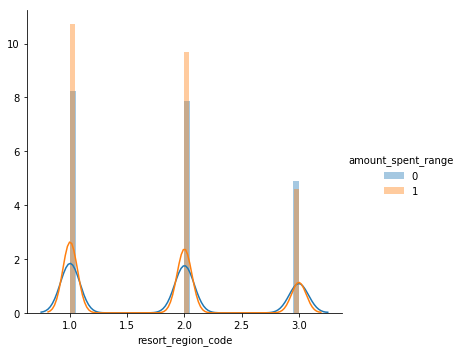

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "resort_region_code").add_legend()
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


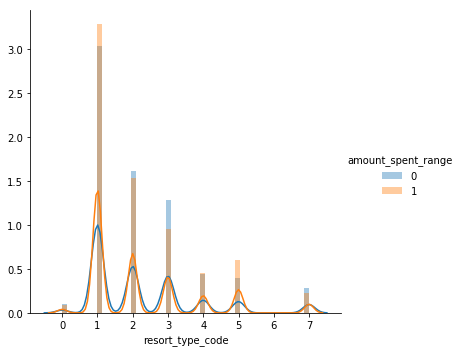

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "resort_type_code").add_legend()
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


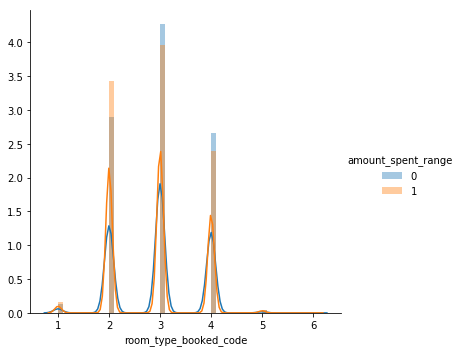

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "room_type_booked_code").add_legend()
plt.show();

In [ ]:
df_train_copy['roomnights'].value_counts()

 3     94256
 2     85105
 4     58487
 6     36932
 1     25777
 5     12303
 8     10716
 9      5107
 12     3546
 10     2912
 7      2883
 15      805
 16      592
 14      496
 11      322
 18      312
 20      215
 13      119
 21       93
 24       89
 17       59
 30       57
 28       50
 27       27
 19       27
 23       19
 22       15
 25       15
 36       12
 31       12
 26       11
 32        9
 35        8
 47        6
 29        5
 34        5
 37        5
 39        5
 42        4
 33        2
-45        1
 60        1
 41        1
 0         1
Name: roomnights, dtype: int64

In [ ]:
#df_train_couples = df_train_copy.loc[df_train_copy['numberofadults']==2]
df_train_copy=df_train_copy.loc[df_train_copy['roomnights']>0]

In [ ]:
df_train_copy["roomnights_count"] = df_train_copy['roomnights'].map(lambda s:1 if s<=8 else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


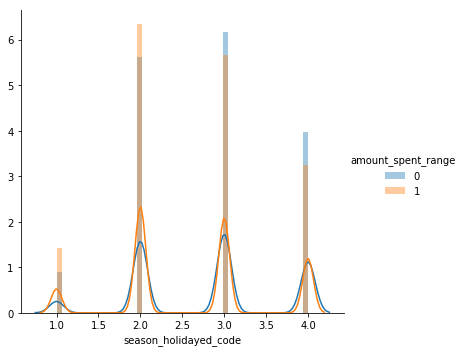

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "season_holidayed_code").add_legend()
plt.show();

In [ ]:
df_train_copy["state_code_residence"].value_counts()

8.0     134917
2.0      41143
1.0      28040
7.0      25873
5.0      21051
4.0      15938
9.0      12291
15.0      9490
10.0      9356
6.0       6384
12.0      6092
3.0       3943
23.0      3835
14.0      3132
16.0      2371
13.0      1771
21.0      1694
20.0      1470
18.0      1429
19.0      1085
26.0      1068
25.0       840
27.0       790
11.0       713
28.0       541
22.0       432
24.0       382
30.0       144
29.0       101
33.0        88
31.0        60
37.0        59
32.0        53
34.0        48
35.0        16
36.0        12
38.0         6
Name: state_code_residence, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


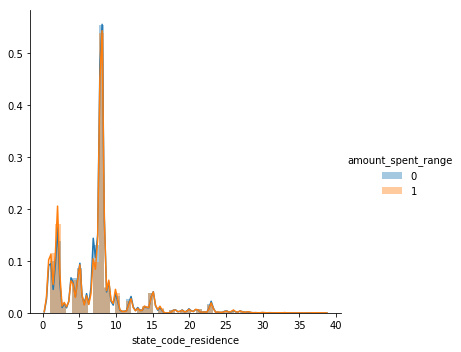

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "state_code_residence").add_legend()
plt.show();

In [ ]:
df_train_copy['state_code_resort'].value_counts()

1     59830
2     55882
6     50868
7     37809
3     33489
5     32784
9     28115
11    18271
4     14820
10     5684
13     3870
Name: state_code_resort, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


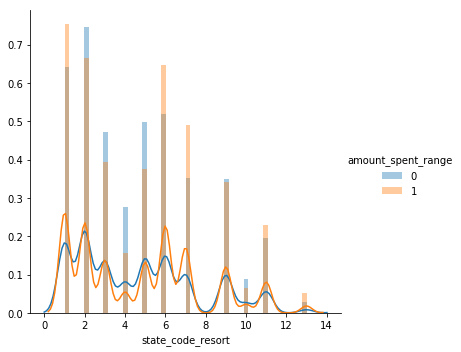

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "state_code_resort").add_legend()
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


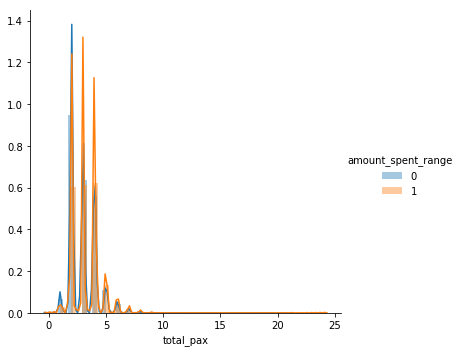

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "total_pax").add_legend()
plt.show();

In [ ]:
df_train_copy['total_pax'].value_counts()

2     106046
3      98503
4      97385
5      20672
6       8350
1       5912
7       3102
8       1093
9        229
10        74
11        18
0         16
12        13
21         3
13         2
20         2
14         1
24         1
Name: total_pax, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


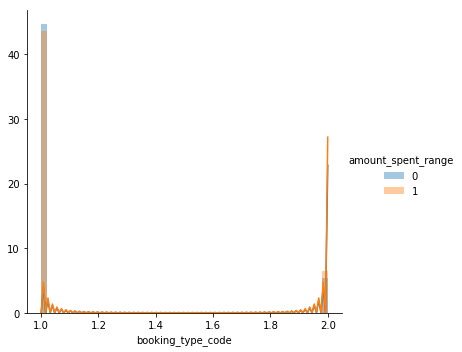

In [ ]:
sns.FacetGrid(df_train_copy, hue="amount_spent_range",size=5).map(sns.distplot, "booking_type_code").add_legend()
plt.show();

In [ ]:
print("For booking type 1:")
print(df_train_copy['amount_spent_range'].loc[df_train_copy['booking_type_code']==1].value_counts())
print("*************************************")
print("For booking type 2:")
print(df_train_copy['amount_spent_range'].loc[df_train_copy['booking_type_code']==2].value_counts())


For booking type 1:
1    237085
0     61929
Name: amount_spent_range, dtype: int64
*************************************
For booking type 2:
1    34923
0     7485
Name: amount_spent_range, dtype: int64


In [ ]:
df_train_copy_one = df_train_copy.drop(['state_code_residence'],axis=1)

Analysis

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/AV_Mahindra_Club/test.csv') 

In [ ]:
df_test.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [ ]:
df_test.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code
count,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146730.000000,144505.000000,146765.000000,146765.000000,146765.000000
mean,1.902068,2.204483,3.275897,0.362287,209.179852,1.774101,2.196675,2.888754,3.730372,2.681088,7.254206,4.750560,3.188410,1.123354
std,0.914653,0.817804,1.783842,0.758218,862.926844,0.753281,1.544679,0.804043,2.482388,0.882366,4.755982,3.101036,1.163872,0.328844
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.000000
max,3.000000,7.000000,32.000000,10.000000,4995.000000,3.000000,7.000000,6.000000,80.000000,4.000000,38.000000,13.000000,21.000000,2.000000


In [ ]:
df_train.shape

(341424, 24)

In [ ]:
print("Column Data types:")
print(df_train.dtypes)

Column Data types:
reservation_id                         object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstat

In [ ]:
df_train_copy.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,reasonable_adult_count,amount_spent_range,HCChan,Prod_code,two_adults
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,1,1,1,1,1
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,1,0,0,1,1
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,1,1,0,1,1
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,1,0,0,1,1
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,1,1,0,1,1


In [ ]:
df_train_one = df_train_copy.iloc[:,4:].drop(['memberid','amount_spent_per_room_night_scaled','resort_id','amount_spent_range','amount_spent_low','amount_spent_average','amount_spent_high'],axis=1)
#df_train_one = df_train.iloc[:,4:22].drop(['memberid'],axis=1)
print(df_train_one.shape)
df_train_one.head()


(341424, 18)


,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,HCChan
0,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,F,C,0
1,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,F,A,1
2,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,1
3,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,D,A,1
4,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,1


In [ ]:
cat_columns = df_train_one.select_dtypes(['object']).columns
df_train_one[cat_columns] = df_train_one[cat_columns].astype('category')
#print(df_train_one.dtypes)
df_train_one[cat_columns] = df_train_one[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
df_train_one[['state_code_residence']] = df_train_one[['state_code_residence']].fillna(value=0.0)
df_train_one[['season_holidayed_code']] = df_train_one[['season_holidayed_code']].fillna(value=0.0)

In [ ]:
df_train_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 17 columns):
channel_code                341424 non-null int64
main_product_code           341424 non-null int64
numberofadults              341424 non-null int64
numberofchildren            341424 non-null int64
persontravellingid          341424 non-null int64
resort_region_code          341424 non-null int64
resort_type_code            341424 non-null int64
room_type_booked_code       341424 non-null int64
roomnights                  341424 non-null int64
season_holidayed_code       341424 non-null float64
state_code_residence        341424 non-null float64
state_code_resort           341424 non-null int64
total_pax                   341424 non-null int64
member_age_buckets          341424 non-null object
booking_type_code           341424 non-null int64
cluster_code                341424 non-null object
reservationstatusid_code    341424 non-null object
dtypes: float64(2), int64(12), o

In [ ]:
df_train_one.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,3.738346,2.672970,7.159397,4.763303,3.193390,4.102433,1.124209,3.290252,0.126166
std,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,2.479054,0.886848,4.745418,3.103909,1.167824,1.909182,0.329821,1.684267,0.439366
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,3.000000,1.000000,2.000000,0.000000
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,4.000000,1.000000,4.000000,0.000000
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,5.000000,1.000000,5.000000,0.000000
max,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,60.000000,4.000000,38.000000,13.000000,24.000000,9.000000,2.000000,5.000000,3.000000


## test

In [ ]:
df_test_one = df_test.iloc[:,4:22].drop(['memberid'],axis=1)
print(df_test_one.shape)
df_test_one.head()

(146765, 17)


,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code
0,3,2,2,0,45,3,3,4,1,2.0,2.0,3,3,H,1,A,C
1,1,2,4,0,45,1,1,4,8,2.0,2.0,4,2,H,1,F,A
2,3,2,3,0,45,2,2,2,3,4.0,2.0,2,3,H,1,D,A
3,1,2,3,0,45,1,1,2,3,2.0,2.0,6,3,H,1,F,A
4,1,2,4,0,45,1,2,3,8,2.0,2.0,11,2,H,1,F,A


In [ ]:
cat_columns = df_test_one.select_dtypes(['object']).columns
df_test_one[cat_columns] = df_test_one[cat_columns].astype('category')
#print(df_train_one.dtypes)
df_test_one[cat_columns] = df_test_one[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
y = df_train_copy[['amount_spent_per_room_night_scaled']]

In [ ]:
X_train = np.array(df_train_one)
y_train = np.array(y).ravel()
#X_test = np.array(df_test_one)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#XGB
xgb_model = xgboost.XGBRegressor().fit(X_train,y_train)
xgb_predictions = xgb_model.predict(X_test)
#print(xgb_predictions)
#xgb_predictions_df = pd.DataFrame(xgb_predictions)
#xgb_predictions_df.columns = ['amount_spent_per_room_night_scaled']

In [ ]:
#RF
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor().fit(X_train,y_train)
rf_predictions = rf_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, rf_predictions))
print (rms)

0.9263516490381299
